In [3]:
from car_part import CarPartDataset, CarPartConfig, prepare_datasets, preprocess_dataset
from pathlib import Path
import colorsys
import random
import numpy as np
import maskrcnn.model as modellib
from maskrcnn.model import log
from maskrcnn import visualize
import scipy.io as sio
import os
import json

import matplotlib.pyplot as plt
plt.ioff()

# Evaluate the model results

### Load the images

In [4]:
images = list(Path('../../../car-damage-estimation/data/damage_nodamage/neokt/train/nodamage').glob('*.jpeg'))

In [5]:
img = plt.imread(images[10])
plt.imshow(img)

IndexError: list index out of range

# Load the last model

In [21]:
config = CarPartConfig()
MODEL_DIR = './logs/'
config.BATCH_SIZE

1

In [22]:
model = modellib.MaskRCNN(mode="inference", config=config,
                          model_dir=MODEL_DIR)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead

Instructions for updating:
Use `tf.cast` instead.


In [23]:
model.find_last()

'./logs/car_parts20190420T0828/mask_rcnn_car_parts_0160.h5'

In [24]:
model.load_weights(model.find_last(), by_name=True)

Re-starting from epoch 160


open the part dictionary

In [25]:
with open('./parts_idx_dict.json', 'r') as f:
    parts_idx_dict = json.load(f)
    parts_idx_dict['background'] = 0
    
idx_parts_dict = {v:k for k,v in parts_idx_dict.items()}
# idx_parts_dict

create a color map

In [26]:
colors = visualize.generate_colormap(len(idx_parts_dict), scaled=False, bright=False)

## make a subplot

In [27]:
def make_subplot(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Inspect the model results

In [30]:
img

(400, 600, 3)

TypeError: display_instances() got multiple values for argument 'ax'

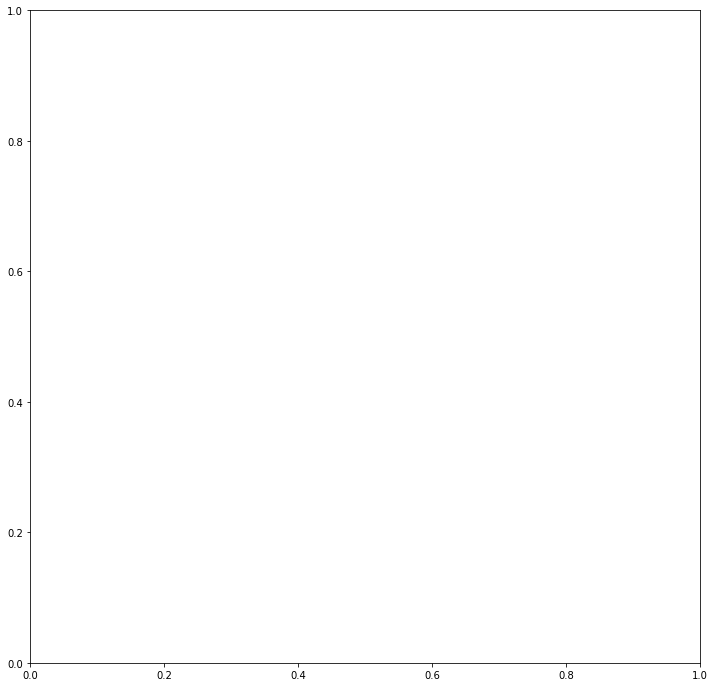

In [28]:
#select an image
for _ in range(10):
    i = random.randint(0, len(images))
    img = plt.imread(images[i])
    result = model.detect([img])[0]
    ax = make_subplot(rows=1, size=12)

    img = visualize.display_instances(img, result['rois'], result['masks'], result['class_ids'], 
                                idx_parts_dict, colors, result['scores'], ax=ax,
                                title="Predictions", show_bbox=False)
    plt.show()